In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img1 = cv2.imread("./images/japan1.jpg", 0)
img2 = cv2.imread("./images/japan3.jpg", 0)
# img1 = cv2.resize(img1, (500, 500))
# img2 = cv2.resize(img2, (500, 500))

In [4]:
sift = cv2.SIFT_create()

In [5]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [6]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

In [7]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [8]:
matches = flann.knnMatch(des1, des2, k = 2)

In [24]:
len(matches)

4740

In [9]:
matchesMAsk = [[0, 0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMAsk[i] = [1, 0]

In [10]:
draw_params = dict(matchColor = (0, 255, 0),
                     singlePointColor = (255, 0, 0),
                        matchesMask = matchesMAsk,
                            flags = cv2.DrawMatchesFlags_DEFAULT)

In [19]:
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[:], None)
img4 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[:50], None)
img5 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params) 

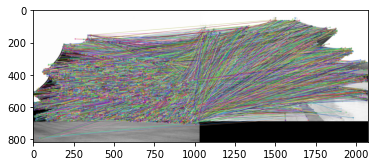

In [20]:
plt.imshow(img3)

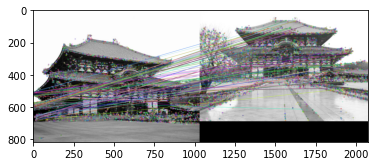

In [21]:
plt.imshow(img4)

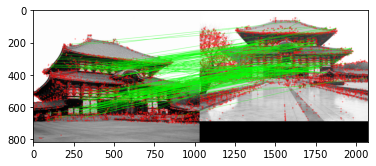

In [22]:
plt.imshow(img5)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f180d57e5b0>)

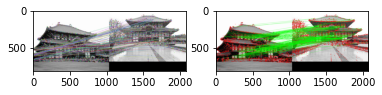

In [14]:
plt.subplot(121), plt.imshow(img3)
# plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img4)
# plt.xticks([]), plt.yticks([])